In [6]:
%matplotlib Widget

import probability_density_functions as pdfs

import importlib
import numpy as np
import matplotlib.pyplot as plt

[[ 0.40511383  0.40265612 -0.82082327]
 [-0.97448247 -0.11710627 -0.19149423]
 [ 0.74745193  0.30308106 -0.59114929]
 ...
 [-0.97902224  0.07997857  0.18740034]
 [-0.25603708  0.80731613  0.53168194]
 [-0.57402104  0.47997005 -0.66342189]]


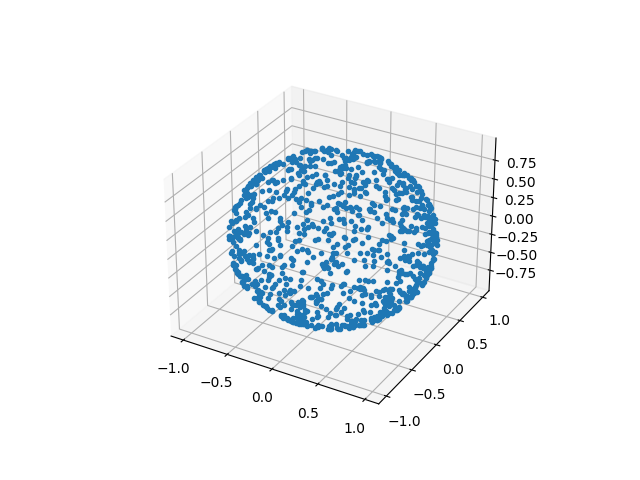

In [13]:
importlib.reload(pdfs)

hypersphere = pdfs.get_samples_gaussian(1000, 3)
print(hypersphere)
ax = plt.figure().add_subplot(projection="3d")
ax.plot(*hypersphere.T, ".")